## FULL WORKING CODE

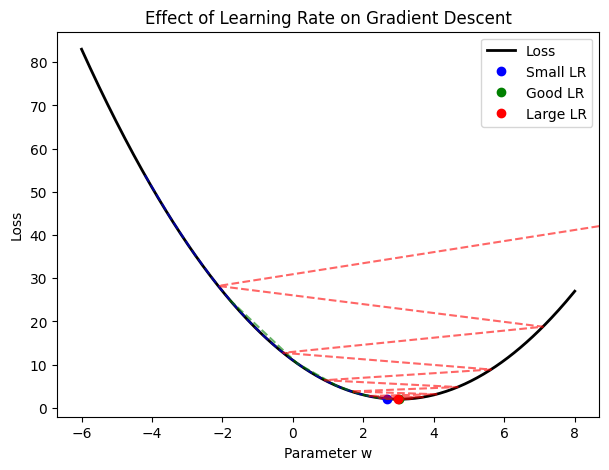

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

# ------------------------------------------------
# Create output folder
# ------------------------------------------------
os.makedirs("gifs", exist_ok=True)

# ------------------------------------------------
# Loss function
# ------------------------------------------------
def loss(w):
    return (w - 3)**2 + 2

def grad(w):
    return 2 * (w - 3)

# ------------------------------------------------
# Learning rates
# ------------------------------------------------
lrs = {
    "Small LR": 0.05,
    "Good LR": 0.2,
    "Large LR": 0.9
}

colors = {
    "Small LR": "blue",
    "Good LR": "green",
    "Large LR": "red"
}

# Initial values
weights = {k: -5.0 for k in lrs}
history = {k: [] for k in lrs}

steps = 30

# ------------------------------------------------
# Run optimization
# ------------------------------------------------
for _ in range(steps):
    for key in lrs:
        w = weights[key]
        w = w - lrs[key] * grad(w)
        weights[key] = w
        history[key].append(w)

# ------------------------------------------------
# Plot setup
# ------------------------------------------------
x = np.linspace(-6, 8, 400)
y = loss(x)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, y, "k", linewidth=2, label="Loss")

points = {}
paths = {}

for name, color in colors.items():
    points[name], = ax.plot([], [], "o", color=color, label=name)
    paths[name], = ax.plot([], [], "--", color=color, alpha=0.6)

ax.set_xlabel("Parameter w")
ax.set_ylabel("Loss")
ax.set_title("Effect of Learning Rate on Gradient Descent")
ax.legend()

# ------------------------------------------------
# Animation
# ------------------------------------------------
writer = PillowWriter(fps=2)

with writer.saving(fig, "gifs/learning_rate_effect.gif", dpi=120):
    for i in range(steps):
        for name in lrs:
            w = history[name][i]
            yv = loss(w)

            paths[name].set_data(
                history[name][: i + 1],
                [loss(v) for v in history[name][: i + 1]]
            )

            points[name].set_data([w], [yv])

        writer.grab_frame()

plt.show()
